# ::::: C O D E :::::

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


### Parameters

In [23]:
# Parameters
p = 5e-6  # pixel pitch (in meters)
lambda_= 500e-9  # wavelength (in meters)
k = 2 * np.pi / lambda_  # wavenumber
z = 100e-6  # propagation distance (in meters)
beta = np.pi / (2 * 255)  # scaling factor

### Load the image and convert to grayscale

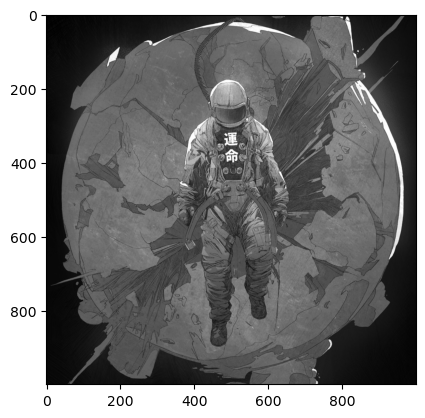

original pixel value:  15


In [24]:
image_path = r'C:\Users\987ta\Desktop\Test.jpg'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.show()
print('original pixel value: ',image[100,100])

### Scale the image pixel values

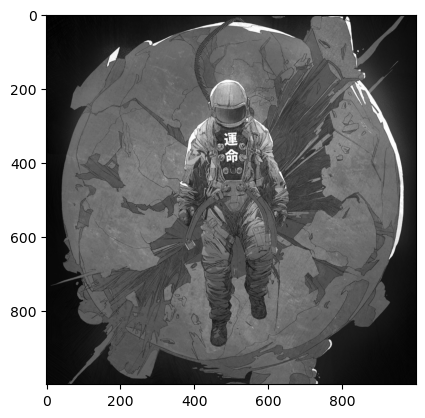

original pixel value:  0.09239978392911156


In [4]:
beta = np.pi / (2 * 255)  # scaling factor
image_scaled = beta * image
plt.imshow(image_scaled, cmap='gray')
plt.show()
print('original pixel value: ' , image_scaled[100,100])

In [5]:
# Get the dimensions of the image
rows, cols = image.shape

### Create the coordinate grids

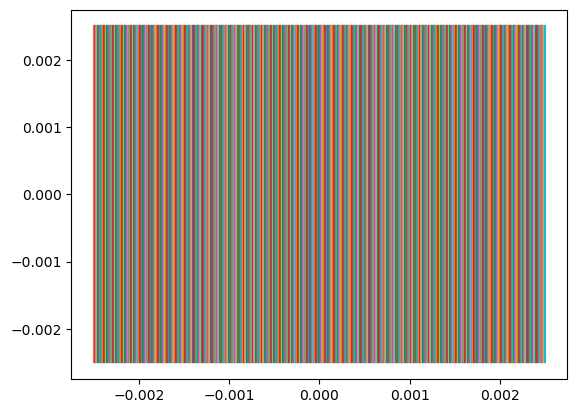

In [6]:
x = np.linspace(-cols//2, cols//2 - 1, cols) * p
y = np.linspace(-rows//2, rows//2 - 1, rows) * p
x, y = np.meshgrid(x, y)
plt.plot(x,y)
plt.show()

### Create the circular aperture function (circ function)

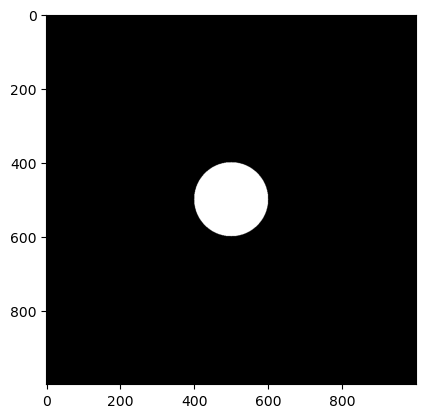

In [7]:
aperture_radius =100# radius in pixels
circ = (x**2 + y**2) <= (aperture_radius * p)**2
plt.imshow(circ, cmap='gray')
plt.show()

In [8]:
# Create the complex field u(x, y) = exp[iβg(x, y)] circ(x² + y²)
u = np.exp(1j * image_scaled) * circ

In [9]:
# Fourier transform of the complex field
U = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(u)))

### Create the frequency grids 

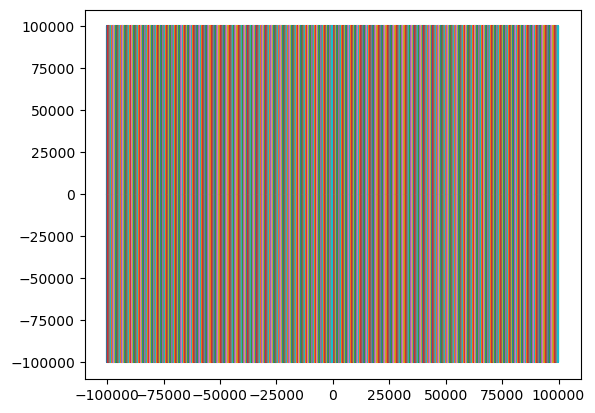

In [10]:
fx = np.fft.fftfreq(cols, d=p)
fy = np.fft.fftfreq(rows, d=p)
fx, fy = np.meshgrid(fx, fy)
plt.plot(fx,fy)
plt.show()


### Compute the propagation transfer function

In [11]:
H = np.exp(1j * z * np.sqrt(k**2 - (2 * np.pi * fx)**2 - (2 * np.pi * fy)**2))
# Apply the transfer function (propagate the field)
U1 = U * H

### Low pass filter (optional but recommended to avoid aliasing artifacts)

In [12]:
# Low pass filter (optional but recommended to avoid aliasing artifacts)
cutoff_freq = 1 / (2 * p)  # Nyquist frequency
low_pass_filter = np.sqrt(fx**2 + fy**2) < cutoff_freq
U1_filtered = U1 * low_pass_filter

### Inverse Fourier transform to get the propagated field

In [13]:
u1 = np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(U1_filtered)))


### Compute the intensity of the propagated field

In [14]:
intensity = np.abs(u1)**2

### Plot the results

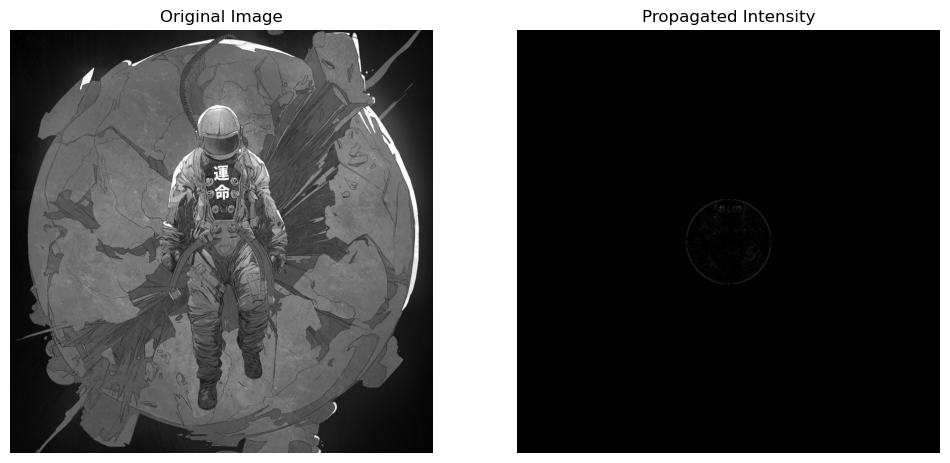

In [15]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Propagated Intensity")
plt.imshow(intensity, cmap='gray')
plt.axis('off')

plt.show()


### Zoomed Version of the image

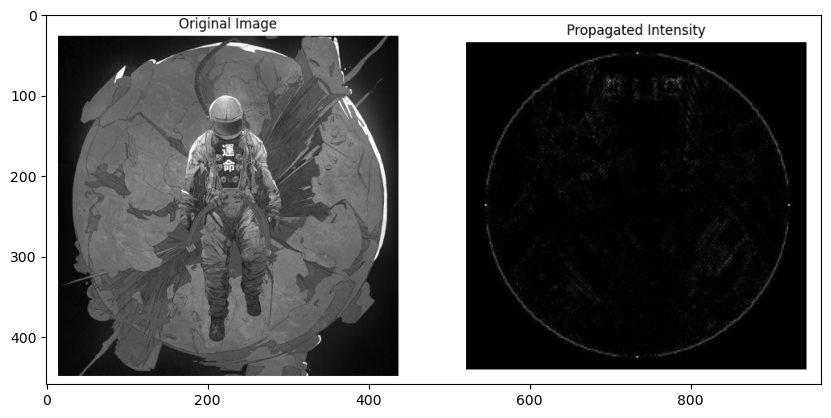

In [16]:
plt.figure(figsize=(10, 6))
plt.imshow(cv2.imread(r'C:\Users\987ta\Desktop\Figure_3.png'))
plt.show()